### 학습목표
- 데이터 탐색을 위한 기술통계 분석을 실습해보자.

### 1. 기술통계 확인하기
데이터 로딩

In [1]:
import pandas as pd
import os # operating system

In [2]:
# 현재 작업하고 있는 경로 확인
os.getcwd() # cwd == current working directory

'C:\\Users\\notye\\ESTCampAI\\python lib'

In [3]:
# 현재 작업하고 있는 경로 내 어떤 폴더, 파일들이 있는지 확인
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'data',
 'ex01numpy.ipynb',
 'ex02Series.ipynb',
 'ex03DataFrame.ipynb',
 'ex04matplotlib.ipynb',
 'my_module.ipynb',
 'my_module.py',
 '__pycache__',
 '기초통계 분석.ipynb']

In [4]:
#  경로 변경('../' -> 뒤로가기)
os.chdir('../') # change directory
print(os.getcwd())

C:\Users\notye\ESTCampAI


In [5]:
os.chdir('python lib')
print(os.getcwd())

C:\Users\notye\ESTCampAI\python lib


In [6]:
pd.read_csv('data/population.csv')

,도시,지역,2020,2015,2010,2005
0,서울,수도권,9668465,10022181.0,10312545.0,10167344
1,부산,경상권,3391946,NaN,NaN,3628293
2,인천,수도권,2942828,2925815.0,NaN,2600495
3,광주,전라권,1450062,1474636.0,1454636.0,1401745
4,대구,경상권,2418436,2466052.0,2431774.0,2456016


In [7]:
# 인코딩 방식 추론하기
import chardet # chardet == character + detection
with open("data/hr-info.csv", 'rb') as f: # read binary : 컴퓨터 언어로 와라
    data = f.read()
chardet.detect(data)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [8]:
hr_info = pd.read_csv('data/hr-info.csv', encoding = "euc-kr")
hr_info.head(3)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


In [9]:
# 데이터 정보 파악하기
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [10]:
# 기술통계확인 함수 -> 기본값이 수치데이터
# count: 열에 몇 개가 있는지, mean: 평균값, std: 표준편차, min: 최소값, 25%: 하위 25% 값, max: 최대값
hr_info.describe()

,AGE,SERVICE_YEAR,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,31.930000,4.660000,1.919900,5987.000000,34.745000
std,7.111114,6.183492,1.748062,1182.676889,40.470971
min,22.000000,0.000000,0.000000,4500.000000,0.000000
25%,27.000000,0.000000,0.000000,5000.000000,4.000000
50%,30.000000,1.000000,1.795000,5600.000000,21.000000
75%,37.000000,8.000000,3.412500,6825.000000,56.750000
max,49.000000,25.000000,4.960000,10200.000000,240.000000


In [11]:
# 기술통계확인 함수 -> include = ["boject"] -> dtype == object
# count: 열에 몇 개가 있는지, unique: 고유한 값의 개수, top: 가장 자주 등장한 값(최빈값), freq: 최빈값의 빈도수
hr_info.describe(include = ["object"])

,EID,ENAME,GENDER,ORG_CD,POS_CD,EDU_LEVEL,LAST_PROMO_DT,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
count,200,200,200,197,200,200,182,200,200,200,49,49,49,200,200
unique,200,200,2,30,9,5,4,91,2,16,8,6,2,6,2
top,E00206,시이오,M,ORG023,P008,학사 학위,2024-03-01,Salesforce,Y,2024-03-01,2024-03-01,이직,N,KOREA,Y
freq,1,1,117,12,55,159,111,24,151,64,19,28,45,102,150


#### 2. 통계 값 개별로 확인하기

##### sum : 총합

In [12]:
# 전체 총 지출 인건비를 확인하자.
hr_info["SALARY"].sum()

np.int64(1197400)

In [13]:
# 학위가 학사인 사람들의 총 인건비를 확인하자.
hr_info[hr_info["EDU_LEVEL"].str.contains("학사")]["SALARY"].sum()

np.int64(910600)

In [14]:
hr_info.loc[hr_info["EDU_LEVEL"].str.contains("학사"), "SALARY"].sum()

np.int64(910600)

##### mean : 평균
- 전체의 데이터의 값을 데이터 개수로 나눈 값
- 극단치가 들어올 경우 영향을 많이 받을 수 있다.

In [15]:
# 전체 편균연봉 확인
print(hr_info["SALARY"].mean())

5987.0


##### median : 중앙값
- 전체 데이터를 정렬해둔 상태로 50% 지점에 있는 값

In [16]:
# 전체 연봉의 중앙값 확인
print(hr_info["SALARY"].median())

5600.0


##### max : 최대값 / min : 최소값

In [17]:
# 최대, 최소 근속연구를 확인해보자.
print(hr_info['SERVICE_YEAR'].max())
print(hr_info['SERVICE_YEAR'].min())

25
0


##### unique : 고유값

In [18]:
# 직원들의 국적 종류를 파악해보자
hr_info['NATION'].unique()

array(['KOREA', 'Japan', 'USA', 'India', 'China', 'UK'], dtype=object)

##### count : 빈도

In [19]:
# 일본 국적의 직원 수를 확인해보자.
hr_info.loc[hr_info['NATION'] == "Japan", "ENAME"].count()

np.int64(21)

##### value_counts : 고유값별 빈도수 확인하기

In [20]:
# 국적별로 인원수를 확인해보자.
hr_info["NATION"].value_counts()

NATION
KOREA    102
USA       22
India     22
Japan     21
UK        18
China     15
Name: count, dtype: int64

#### 연습문제
- 교육수준에 따른 평균 연봉을 통계내서 확인해보자.

In [21]:
# "EDU_LEVEL" 컬럼의 고유값 파악하기
edLv = hr_info["EDU_LEVEL"].unique()

for lv in edLv:
    print(lv, hr_info.loc[hr_info["EDU_LEVEL"] == lv, "SALARY"].mean())

박사 학위 8166.666666666667
학사 학위 5727.044025157233
석사 학위 6900.0
고등학교 졸업 6140.0
전문대 학위 5050.0


#### 3. 데이터 그룹화를 이용해서 통계분석해보자.

groupby 사용 기본

In [22]:
hr_info[["EDU_LEVEL", "SALARY"]].groupby(by = "EDU_LEVEL").get_group("박사 학위")

,EDU_LEVEL,SALARY
0,박사 학위,10200
1,박사 학위,9500
2,박사 학위,9100
3,박사 학위,8500
4,박사 학위,8600
10,박사 학위,8600
13,박사 학위,8500
17,박사 학위,7600
19,박사 학위,7500
51,박사 학위,7100


In [23]:
# 실제 groupby 사용 방법
hr_info[["EDU_LEVEL", "SALARY"]].groupby(by = "EDU_LEVEL").mean()

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


#### 쉬운 예제

In [24]:
import pandas as pd
f_data = pd.DataFrame({'과일': ['사과', '바나나', '사과', '바나나', '사과'],
                       '가격': [1000, 2000, 1500, 2200, 1300]})
f_data

,과일,가격
0,사과,1000
1,바나나,2000
2,사과,1500
3,바나나,2200
4,사과,1300


In [25]:
f_data.groupby(by = "과일").mean().astype(int)

,가격
과일,
바나나,2100
사과,1266


두 개 이상의 기준으로 그룹화

In [26]:
# 교육 수준과 성별에 따른 평균연봉을 구해보자.

In [27]:
hr_info[["EDU_LEVEL", "GENDER", "SALARY"]].groupby(by = ["EDU_LEVEL", "GENDER"]).mean()

SALARY
EDU_LEVEL GENDER             
고등학교 졸업   F       6200.000000
          M       6100.000000
박사 학위     F       8425.000000
          M       8037.500000
석사 학위     F       7233.333333
          M       6525.000000
전문대 학위    F       5600.000000
          M       4500.000000
학사 학위     F       5643.076923
          M       5785.106383

In [28]:
hr_info[["EDU_LEVEL", "GENDER", "SALARY"]].groupby(by = ["EDU_LEVEL", "GENDER"]).agg(['mean', 'max', 'min', 'median'])
# aggregate : 집계하다

SALARY                     
                         mean    max   min  median
EDU_LEVEL GENDER                                  
고등학교 졸업   F       6200.000000   8500  4500  5900.0
          M       6100.000000   7100  4500  6250.0
박사 학위     F       8425.000000   9500  7100  8550.0
          M       8037.500000  10200  5800  8050.0
석사 학위     F       7233.333333   8600  5700  7000.0
          M       6525.000000   7500  5100  6850.0
전문대 학위    F       5600.000000   5600  5600  5600.0
          M       4500.000000   4500  4500  4500.0
학사 학위     F       5643.076923   7400  4500  5600.0
          M       5785.106383   8500  4500  5600.0

그룹화 후 컬럼별로 다른 연산 적용하기

In [29]:
# 국적에 따른 평균 성과평가점수, 최대 연봉 확인하기
hr_info.groupby(by = "NATION").agg({"PERFORMANCE_SCORE":"mean", "SALARY":"max"})

,PERFORMANCE_SCORE,SALARY
NATION,,
China,2.550000,7400
India,1.854545,8300
Japan,2.672381,8600
KOREA,1.461765,10200
UK,2.692778,7300
USA,2.329091,8500


#### 연습문제
- 조직코드별로 평균성과평가 점수와 평균연봉을 확인해보자.
- "ORG_CD" -> 조직코드 "PERFORMANCE_SCORE" -> 성과평가 점수 "SALARY" -> 연봉
- 성과평가 점수와 연봉의 상관관계를 파악해보자.

In [30]:
hr_info[["ORG_CD", "PERFORMANCE_SCORE", "SALARY"]].groupby(by = "ORG_CD").mean()

,PERFORMANCE_SCORE,SALARY
ORG_CD,,
ORG001,0.655000,5033.333333
ORG002,1.742500,6550.000000
ORG003,2.500000,6480.000000
ORG004,2.872727,6445.454545
ORG005,1.076250,5525.000000
ORG006,1.708333,5966.666667
ORG007,2.817143,6728.571429
ORG008,1.322000,6020.000000
ORG009,1.870000,5520.000000


### 4. 상관계수 분석
- 두 변수 사이의 관계를 수치화해서 분석해보자.

### 공분산, 표준편차, 상관계수
- 상관계수 : 두 변수 간 상관관계의 강도를 나타낸다(수치로 확인 가능) -> -1 ~ 1
  - 1 : 비례
  - -1 : 반비례
  - 0 : 관계X
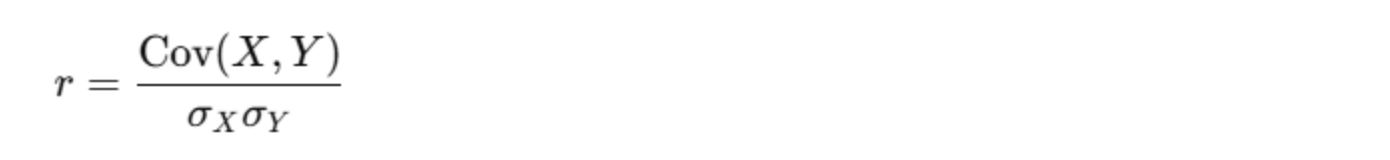
---
- 표준편차 : 데이터 값이 평균값을 기준으로 얼마나 흩어져있는지 알 수 있는 값
- 작은 표준편차: 데이터가 평균값 근처에 밀집되어있다.
- 큰 표준편차 : 데이터가 평균값에서 많이 퍼져있다.
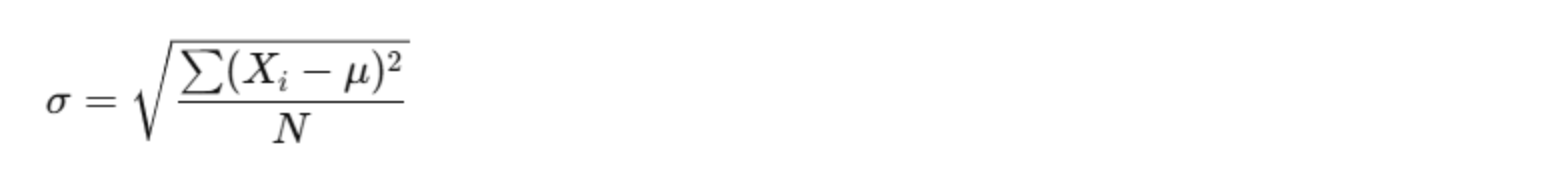
---
- 공분산 : 두 특성 간의 선형관계를 수치화하여 나타낸 값
  - 양의 공분산 : 비례
  - 음의 공분산 : 반비례
  - 0에 가까운 공분산 : 관계X
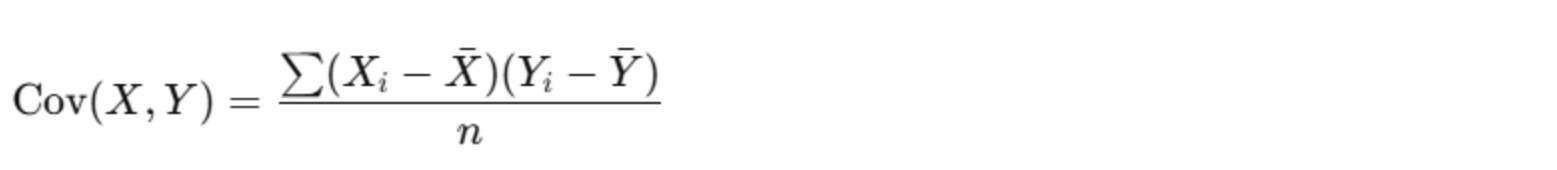

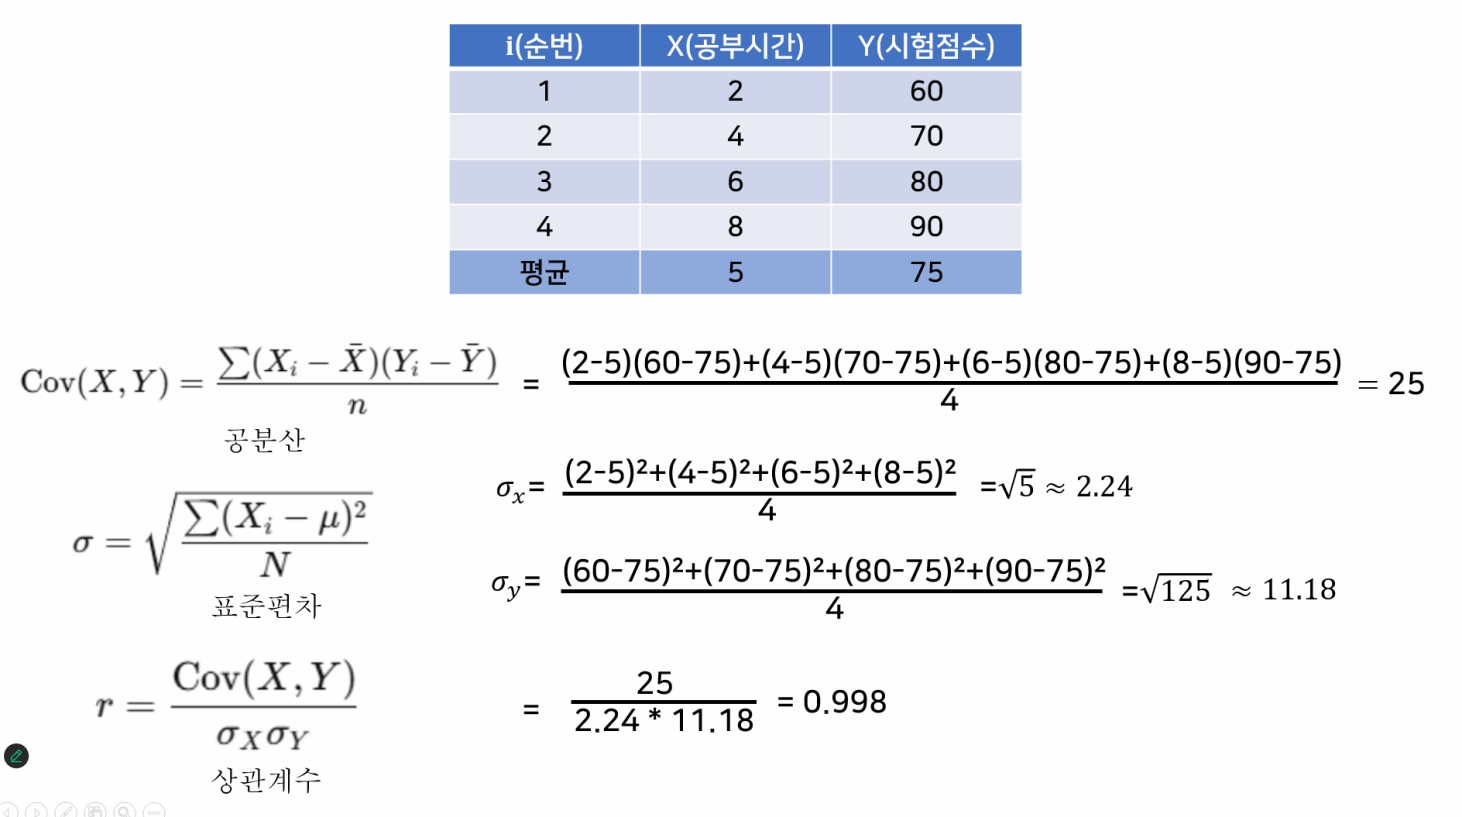

In [31]:
import pandas as pd

# 데이터
X = [2, 4, 6, 8]        # 공부한 시간
Y = [60, 70, 80, 90]    # 시험 점수

# DataFrame 생성
df = pd.DataFrame({
    '공부한시간': X,
    '시험점수': Y
})
df

,공부한시간,시험점수
0,2,60
1,4,70
2,6,80
3,8,90


In [32]:
df.corr() # correlation

,공부한시간,시험점수
공부한시간,1.0,1.0
시험점수,1.0,1.0


In [33]:
result = hr_info[["ORG_CD", "PERFORMANCE_SCORE", "SALARY"]].groupby(by = "ORG_CD").mean()
result.corr()

,PERFORMANCE_SCORE,SALARY
PERFORMANCE_SCORE,1.000000,0.665089
SALARY,0.665089,1.000000


In [34]:
# 수치데이터 전체 상관계수 파악
hr_info[["PERFORMANCE_SCORE", "SALARY", "TRAINING_HOURS", "AGE", "SERVICE_YEAR"]].corr()

,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS,AGE,SERVICE_YEAR
PERFORMANCE_SCORE,1.000000,0.609152,0.551200,0.582203,0.492801
SALARY,0.609152,1.000000,0.628931,0.961699,0.970875
TRAINING_HOURS,0.551200,0.628931,1.000000,0.575867,0.559911
AGE,0.582203,0.961699,0.575867,1.000000,0.932563
SERVICE_YEAR,0.492801,0.970875,0.559911,0.932563,1.000000
